# Assignment 4 : Reinforcement Learning

# Introduction

The aim of this assignment is to understand and implement Reinforcement learning. We are going to use Temporal Difference learning SARSA or Q-learning for this assignment.

# Problem-

### Rummy (Modified)-

Rummy is mostly played by 4 players where each player get 10 cards and rest of placed as closed deck.

But for this assignment to keep it simple, we have changed some rules, reduced the deck of cards and distribution of the cards among each player. Otherwise, our Q table would be very large to handle on our local machines.

So in this game each player will get 3 cards randomly from 'A' to '5'. With each turn you have to pick a card either from the pile of closed or open cards depending on the cards you have. After that you have to select a card to drop to the pile from your deck. Your goal is to make all of your 3 cards of same number. As soon as one player reaches the goal state, it will meld the cards and game will stop and all other player will get score as the sum of their cards in hand. Player with minimum score will win the game.

Each player will play for the 10 rounds and if nobody reach to the meld stage then each will player will get score equivalent to the sum of their cards in hand.

Player with the lowest score wins the game.

## Rules-

You can only play till max occurs which is now 20. If you are able to meld your cards, you win otherwise you lose points as per your stash score.

Lets Simulate a Game Round : The Goal of this game is to collect cards with the same rank. Naming Conventions to be  followed- H : Hearts, S : Spades, D : Diamonds, C : Clubs. Stash/Hand are the cards which you have. Stash/Hand Score: The sum of the rank of cards.

On the first turn you will be given 3 cards from the randomly shuffled deck. Eg: 3H, 2S, AD. Stash Score: 6
In the next step you will have to either pick a card from pile or the deck. On the first turn, the topmost card of the deck is on the pile. The card on the pile is visible to you. So Card on the Pile let's say is 2D . You have to decide whether you have to pick this card or you have to pick from pile.
Following the pickup step, you will have to drop one card from the stash/hand. Your Hand : 3H, 2S, AD, 2D
You can drop any one of these cards, but remember if you drop 2S or 2D you might not be able to make a series. So you have to decide whether to drop 3H or AD. Since there are maximum 20 turns, you have to keep your score low as well, Higher the score the higher points you lose. So you decide to drop 3H. Your hand/stash will be: 2S, 2D, AD
Your opponent will play his hand, he/she shall pick up a card from a pile or deck and the drop a card to the pile.
Now its your turn. The card on the Pile : 5H. Since picking up this card won't help you much. You decide to pick a card from the Deck. You get lucky, you get a 2C card. Your hand now is 2S, 2D, 2C, AD. Hurray! You can now meld these cards and drop the last card to make your score 0.
You win this round. Your opponent Stash/Hand score : 15. So you are at 0 points and your opponent is at 15 points. You are ahead of him since you have to keep your score as low as possible.

# Environment-

In [22]:
# Importing libraries-
import random 
from functools import reduce
from collections import defaultdict
import numpy as np
from copy import copy
%matplotlib inline

Here, we define the SUITS, RANKS of the cards and their RANK_VALUE.

In [23]:
SUIT = ['H','S','D','C']
RANK = ['A', '2', '3', '4', '5','6','7']
RANK_VALUE = {'A': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'T': 10, 'Q': 10, 'K': 10}

# Card Class Definition-

__init__  : Defines the card details such as rank, suit and calculates the rank value

In [24]:
class Card:
    def __init__(self,rank,suit):
        self.rank = rank
        self.suit = suit
        self.rank_to_val = RANK_VALUE[self.rank]
    
    def __str__(self):
        return f'{self.rank}{self.suit}'

    def __repr__(self):
        return f'{self.rank}{self.suit}'

    
    def __eq__(self, other):
        return self.rank == other.rank and self.suit == other.suit

# Deck class contains some basic operations performed with the cards:
# 1. Shuffling the cards.
# 2. Drawing card from the deck.

# Deck Class Definition
__shuffle__ : Shuffles the deck in random order

__draw_card__ : Draws a card from the top of the deck

In [25]:
class Deck:
    def __init__(self, packs):
        self.packs = packs
        self.cards = []
        for pack in range(0, packs) :
            for suit in SUIT:
                for rank in RANK:
                    self.cards.append(Card(rank, suit))
    
    def shuffle(self):
        random.shuffle(self.cards)
    
    def draw_card(self):
        card = self.cards[0]
        self.cards.pop(0)
        return card

## Player Class:

### 1.__init__(self,name,stash=list(),isBot=False): 
Initializing stash, name, isBot/dealer points for each player.

### 2. deal_card(self,card):
This method appends the card in the stash and check the condition that length of stash should not be greater than nuber of cards length in game.

### 3. drop_card(self,card):
This method removes the card from stash and add that card into pile.

### 4. meld(self):
This method tries to find the cards with the same rank in the hand. If it finds then it will merge the cards in the hand to the melded cards array in the game. 

### 5. stash_score(self):
This method calculates sum of all the cards in stash according to the rank of each card.

### 6. get_info(self,debug):
This function fetch all the information of the player.

In [26]:
class Player:

    """  
        Player class to create a player object.
        eg: player = Player("player1", list(), isBot = False)
        Above declaration will be for your agent.
        All the player names should be unique or else you will get error.
        
    """

    def __init__(self, name, stash=list(), isBot=False, points=0, conn=None):
        self.stash = stash
        self.name = name
        self.game = None
        self.isBot = isBot
        self.points = points
        self.conn = conn


    def deal_card(self,card):
        try :
            self.stash.append(card)
            if len(stash) > self.game.cardsLength + 1:
                raise ValueError('Cannot have cards greater than ')
        except ValueError as err:
            print(err.args)


    def drop_card(self,card):
        self.stash.remove(card)
        self.game.add_pile(card)
        return -1


    def meld(self):
        card_hash = defaultdict(list)
        for card in self.stash:
            card_hash[card.rank].append(card)
        melded_card_ranks = []
        for (card_rank,meld_cards) in card_hash.items():
            if len(meld_cards) >= 3 :
                self.game.meld.append(meld_cards)
                melded_card_ranks.append(card_rank)
                for card in meld_cards:
                    self.stash.remove(card)
        
        for card_rank in melded_card_ranks :
            card_hash.pop(card_rank)
        return len(melded_card_ranks) > 0


    def stash_score(self) :
        score = 0
        for card in self.stash :
            score += RANK_VALUE[card.rank]
        return score


    def get_info(self, debug):
        if debug :
            print(f'Player Name : {self.name} \n Stash Score: {self.stash_score()} \n Stash : {", ".join(str(x) for x in self.stash)}')
        card_ranks = []
        card_suits = []
        pileset = None
        pile = None
        for card in self.stash :
            card_suits.append(RANK_VALUE[card.rank])
            card_ranks.append(card.suit)
        if len(self.game.pile) > 0 : 
            return {"Stash Score" : self.stash_score(), "CardSuit":  card_suits, "CardRanks": card_ranks, "PileRank": self.game.pile[-1].rank, "PileSuit":self.game.pile[-1].suit}
        return {"Stash Score" : self.stash_score(), "CardSuit":  card_suits, "CardRanks": card_ranks}


## Game Enviroment:

### 1. __init():  This method will initialize the environment.

### 2. add_pile(self, card):  This method takes a card as argument and first checks number of cards in the deck. If its is ‘0’ then add the cards from file to deck and append the passed card to the pile.

### 3. pick_card(self, player, action):  This methods helps player picking up the card from either Pile or Deck based on action.
			We have defined, If action = 0 then, player will pick a card from Pile
			And if action. = 1 then player will pick card from Deck. 
			Meld condition will be check after player picks the card, if the meld condition satisfied, player won. 
            You can modify the rewards in return, only the values

### 4. pick_from_pile(self, player): This method helps player picking card from the pile and simultaneously a card from pile gets reduced.

### 5. pick_from_deck(self, player): This method is similar to above method but it helps picking up card from the Deck. 

### 6. get_player(self, player_name): This function fetch the details of the player given player_name.

### 7. computer_play(self, player): This method defines the play of the computer/Dealer in following sequence:
			 Randomly taking actions from picking up card from deck/pile.
			 Checking the meld condition afterwards.
			 If the meld condition is not satisfied, remove the card from his stash.

### 8. play(self): This method defines all the function city of play for the player:
		   Decrementing the maximum number of turns defined per game.
		   For each player, it will check the 'stash', if the 'Stash' for any player = 0 (That player won), it will add the value of each card in stash for all other players.
		   Or If maximum number of turns in each round becomes 0, it will add the card values in stash for all the players and return.
      
### 9. drop_card(self,player,card) This method drops a card from the player given player object and card object and returns the reward associated with it.

### 10. reset(self, players): This method will reinitialize all the deck, pile and players.

### 11. _update_turn(self): This method is used to count the number of turns in the game.

In [27]:
class RummyAgent() :
    """
    Simple Rummy Environment
    
    Simple Rummy is a game where you need to make all the cards in your hand same before your opponent does.
    Here you are given 3 cards in your hand/stash to play.
    For the first move you have to pick a card from the deck or from the pile. 
    The card in deck would be random but you can see the card from the pile.
    In the next move you will have to drop a card from your hand.
    Your goal is to collect all the cards of the same rank. 
    Higher the rank of the card, the higher points you lose in the game. 
    You need to keep the stash score low. Eg, if you can AH,7S,5D your strategy would be to either find the first pair of the card or by removing the highest card in the deck.
    You only have 20 turns to either win the same or collect low scoring card.
    You can't see other players cards or their stash scores.
    
    Parameters
    ====
    players: Player objects which will play the game.
    max_card_length : Number of cards each player can have
    max_turns: Number of turns in a rummy game
    """

    def __init__(self, players, max_card_length=5, max_turns=20) :
        self.max_card_length = max_card_length
        self.max_turns = max_turns
        self.reset(players)
        
    def update_player_cards(self,players):
        for player in players :
            player = Player(player.name, list(), isBot=player.isBot, points=player.points, conn=player.conn)
            stash = []
            for i in range(self.max_card_length):
                player.stash.append(self.deck.draw_card())
            player.game = self
            self.players.append(player)
        self.pile = [self.deck.draw_card()]

    def add_pile(self,card):
        if len(self.deck.cards) == 0 :
            self.deck.cards.extend(self.pile)
            self.deck.shuffle()
            self.pile = []
        self.pile.append(card)
        
        
    def pick_card(self,player,action):
        if action == 0:
            self.pick_from_pile(player)
        else :
            self.pick_from_deck(player)
        state = [c for c in player.stash]
        if player.meld() :
            return {"reward" : 10, 'state': state}
        else :
            return {"reward" : -1, 'state': state}
#             return -player.stash_score()
       
    def pick_from_pile(self, player):
        card = self.pile[-1]
        self.pile.pop()
        return player.stash.append(card)
     
    def pick_from_deck(self, player):
        return player.stash.append(self.deck.draw_card())
    
    def get_player(self,  player_name):
        return_player = [player for player in self.players if player.name == player_name]
        if len(return_player) != 1:
            print("Invalid Player")
            return None
        else:
            return return_player[0]
    
    def drop_card(self,player,card):
        player.drop_card(card)
        return {"reward" : -1}


    def computer_play(self,player):
        #Gets a card from deck or pile
        if random.randint(0,1) == 1 :
            self.pick_from_pile(player)
        else :
            self.pick_from_deck(player)
            
        #tries to meld if it can
#         if random.randint(0,10) > 5 :
        player.meld()
        
        #removes a card from the stash
        if len(player.stash) != 0:
            card = player.stash[(random.randint(0,len(player.stash) - 1))]
            player.drop_card(card)
        
    def play(self):
        for player in self.players :
            if len(player.stash) == 0 :
                return True
        if self.max_turns <= 0 :
            return True
        return False

    def _update_turn(self):
        self.max_turns -= 1  
    
    def reset(self,players,max_turns=20):
        self.players = []
        self.deck = Deck(1)
        self.deck.shuffle()
        self.meld = []
        self.pile = []
        self.max_turns = max_turns
        self.update_player_cards(players)




### Example Run-

This following code shows how to create an environment and players to play 10 games with 20 maximum rounds.

In [40]:
p1 = Player('Sahil',list())
p2 = Player('comp1',list(),isBot=True)
rummy = RummyAgent([p1,p2],max_card_length=3,max_turns=20)

In [41]:
maxiter = 3
debug = True
for j in range(maxiter):
        for player in rummy.players :
            player.points = player.stash_score()
        
        rummy.reset(rummy.players)
        random.shuffle(rummy.players)
        # int i = 0 
        if debug :
            print(f'**********************************\n\t\tGame Starts : {j}\n***********************************')
        while not rummy.play() :    
            rummy._update_turn()
            print(rummy.max_turns)       
            for player in rummy.players:
                if player.isBot :
                    if rummy.play():
                        continue
                    if debug :
                        print(f'{player.name} Plays')
                    rummy.computer_play(player)
                    if debug :
                        player.get_info(debug)
                        if player.stash == 0 :
                            print(f'{player.name} wins the round')

                else :
                    if rummy.play() :
                        continue
                    if debug :
                        print(f'{player.name} Plays')
                    player_info = player.get_info(debug)
                    action_taken = np.random.choice(1)
                    if debug :
                        print(f'Card in pile {player_info["PileSuit"]}{player_info["PileRank"]}')
                    result_1 = rummy.pick_card(player,action_taken)
                    result_1 = result_1["reward"]

                    if debug : 
                        print(f'{player.name} takes action {action_taken}')
                    #player stash will have no cards if the player has melded them 
                    #When you have picked up a card and you have drop it since the remaining cards have been melded. 
                    if len(player.stash) == 1:
                        rummy.drop_card(player,player.stash[0])
                        if debug :
                            print(f'{player.name} Wins the round')

                    elif len(player.stash) != 0 :

                        player_info = player.get_info(debug)
                        s = player_info['CardRanks']
                        action_taken = np.random.choice(4)
                        card = player.stash[action_taken]
                        if debug :
                            print(f'{player.name} drops card {card}')

                        result_1 = rummy.drop_card(player,card)
                        result_1 = result_1["reward"]
#                             pdb.set_trace()
                    else :
                        if debug :
                            print(f'{player.name} Wins the round')
                    if debug :
                        player.get_info(debug)
        


**********************************
		Game Starts : 0
***********************************
19
comp1 Plays
Player Name : comp1 
 Stash Score: 12 
 Stash : AD, 4D, 7C
Sahil Plays
Player Name : Sahil 
 Stash Score: 8 
 Stash : AS, 3S, 4H
Card in pile D2
Sahil takes action 0
Player Name : Sahil 
 Stash Score: 10 
 Stash : AS, 3S, 4H, 2D
Sahil drops card AS
Player Name : Sahil 
 Stash Score: 9 
 Stash : 3S, 4H, 2D
18
comp1 Plays
Player Name : comp1 
 Stash Score: 12 
 Stash : 4D, 7C, AS
Sahil Plays
Player Name : Sahil 
 Stash Score: 9 
 Stash : 3S, 4H, 2D
Card in pile DA
Sahil takes action 0
Player Name : Sahil 
 Stash Score: 10 
 Stash : 3S, 4H, 2D, AD
Sahil drops card 4H
Player Name : Sahil 
 Stash Score: 6 
 Stash : 3S, 2D, AD
17
comp1 Plays
Player Name : comp1 
 Stash Score: 9 
 Stash : 4D, AS, 4H
Sahil Plays
Player Name : Sahil 
 Stash Score: 6 
 Stash : 3S, 2D, AD
Card in pile C7
Sahil takes action 0
Player Name : Sahil 
 Stash Score: 13 
 Stash : 3S, 2D, AD, 7C
Sahil drops card 2D
Play

# Review of SARSA and Q- Learning-

SARSA and Q-Learning are methods of Temproal Difference used to update the Q-table values.Each state and action is mapped with a real number which indicates the action that shoulkd be taken when a in a state so as to maximize the rewards. So the Q-table can be said to store a mapping of states and actions.SARSA and Q-Learning are similar approaches ,with a difference in the process of updating the Q-table.In SARSA we assume that we will follow a certain policy and choose that action to be as if it were to be in accordance with the policy and update the Q-table accordingly.It is also called on-policy and can be given as -
$$
    Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha ( R_{t+1} + \gamma Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t)) 
$$


In Q-Learning or off-policy we don't assume a policy and follow it but rather we update the Q-table exploring all the policies and choose a suitable one.
$$
    Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha ( R_{t+1} + \gamma \max_a Q(s_{t+1}, a) - Q(s_t, a_t)) 
$$

### Choice of TD learning and Reason

We have opted for SARSA approach considering the simplicity of implementation and better understanding for the approach. We know that for rummy there will be a large number of states possible and it will create space requirement issues. Also following the on-policy approach will give better results than implementing Q-learning.

### Function Approximator:
We have used look-up tables since we are using SARSA.

# RLAgent for Rummy-

In [123]:
class RLAgent:
    """
        Reinforcement Learning Agent Model for training/testing
        with Tabular function approximation

    """

    def __init__(self, env, epsilon=0.2, alpha=0.1, gamma=1):
        self.env = env
#         self.size = env.get_size()
        self.n_a = 2
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.comp_wins = 0
        self.player_wins= 0
        # TODO: 
        # self.Q table including the surrounding border
        self.Q = np.zeros((7, 7, 7, 7, 2, 4))

    def epsilon_greed_pick(self, s):
        if np.random.uniform() < self.epsilon:
            idx = np.random.randint(2)
        else:
            idx = np.where(self.Q[s[0], s[1], s[2], s[3], :, 0] == np.max(self.Q[s[0], s[1], s[2], s[3], :, 0]))[0][0]
        return idx

    def epsilon_greed_drop(self, s):
        if np.random.uniform() < self.epsilon:
            idx = np.random.randint(4)
        else:
            idx = np.where(self.Q[s[0], s[1], s[2], s[3], 0, :] == np.max(self.Q[s[0], s[1], s[2], s[3], 0, :]))[0][0]
        return idx
    
    
    def train(self, **params):

        # parameters
        reward_trace=[]
        maxiter = 5000           # Number of games <- update to higher value to train better
        debug = False
        for j in range(maxiter):
            for player in self.env.players :
                reward=[]
                player.points = player.stash_score()

            self.env.reset(self.env.players)
            random.shuffle(self.env.players)
            # int i = 0
            w=0
            l=0
            if debug :
                
                print(f'**********************************\n\t\tGame Starts : {j}\n***********************************')
            for s in range(50):
                while not self.env.play() :
                    self.env._update_turn()
    #                 print(self.env.max_turns)
                    for player in self.env.players:
                        if player.isBot :
                            if self.env.play():
                                continue
                            if debug :
                                print(f'{player.name} Plays')
                            self.env.computer_play(player)
                            if debug :
                                player.get_info(debug)
                                if player.stash == 0 :
                                    print(f'{player.name} wins the round')
                                    self.comp_wins += 1

                        else :
                            if self.env.play() :
                                continue
                            if debug :
                                print(f'{player.name} Plays')
                            player_info = player.get_info(debug)

                            s = [c.rank_to_val - 1 for c in player.stash]
                            s.append(self.env.pile[-1].rank_to_val - 1)
    #                         print(f'.........................{s}')

                            a = self.epsilon_greed_pick(s=s)
                            action_taken = a
                            if debug :
                                print(f'Card in pile {player_info["PileSuit"]}{player_info["PileRank"]}')

                            result_1 = self.env.pick_card(player, a)
                            r = result_1["reward"]
                            reward.append(r)
    #                         print(result_1['state'])
                            s_prime = [c.rank_to_val - 1 for c in result_1['state']]
                            a_prime = self.epsilon_greed_drop(s=s_prime)

    #                         Updating the Q table for pick action

                            self.Q[s[0], s[1], s[2], s[3], a, :] += self.alpha * (r + self.gamma * self.Q[s_prime[0], s_prime[1], s_prime[2], s_prime[3], 0, a_prime] -\
                                                 self.Q[s[0], s[1], s[2], s[3], a, 0])
                            s = s_prime
                            a = a_prime

                            if debug :
                                print(f'{player.name} takes action {action_taken}')
                            #player stash will have no cards if the player has melded them
                            #When you have picked up a card and you have drop it since the remaining cards have been melded.
                            if len(player.stash) == 1:
                                self.env.drop_card(player,player.stash[0])
                                if debug :
                                    print(f'{player.name} Wins the round')
                                    self.player_wins += 1


                            elif len(player.stash) != 0 :

                                player_info = player.get_info(debug)
    #                             s = player_info['CardRanks']
                                action_taken = a
                                card = player.stash[action_taken]
                                if debug :
                                    print(f'{player.name} drops card {card}')

                                result_1 = self.env.drop_card(player,card)
                                r = result_1["reward"]
                                reward.append(r)
                                s_prime_drop = s
                                a_prime = self.epsilon_greed_pick(s=s_prime_drop)

    #                            Updating the Q table for drop action

                                self.Q[s[0], s[1], s[2], s[3], :, a] += self.alpha * (r + self.gamma * \
                                                                                      self.Q[s_prime_drop[0], s_prime_drop[1], s_prime_drop[2], s_prime_drop[3], a_prime, 0] -\
                                                                                      self.Q[s[0], s[1], s[2], s[3], 0, a])
                            else :
                                if debug :
                                    print(f'{player.name} Wins the round')
                            if debug :
                                player.get_info(debug)


            reward_trace.append(np.sum(reward))
            for z in range(len(reward_trace)):
                if reward_trace[z]>=0:
                    w=w+1
                else:
                    l=l+1
        return w,l,reward_trace
        
    def test(self, start, maxstep=1000):
        epsilon = 0
        env.init(start)
        s = env.get_cur_state()
        # selection an action
        a = self.epsilon_greed(epsilon, s)

        trace = np.array(coord_convert(s, self.size))
        # run simulation for max number of steps
        for step in range(maxstep):
            # move
            r = env.next(a)
            s1 = env.get_cur_state()
            a1 = self.epsilon_greed(epsilon, s1)

            trace = np.vstack((trace, coord_convert(s1, self.size)))

            if env.is_goal(): # reached the goal
                break

            s = s1
            a = a1

        return trace

In [130]:
p1 = Player('Sahil', list())
p2 = Player('comp1', list(), isBot=True)
rummy = RummyAgent([p1,p2], max_card_length=3, max_turns=20)

agent_smith = RLAgent(rummy)
w,l,t=agent_smith.train()

In [131]:
t

[-4,
 -38,
 -38,
 -38,
 -38,
 -36,
 -20,
 -8,
 -12,
 -38,
 -6,
 -38,
 -10,
 -38,
 -38,
 -38,
 -38,
 2,
 -18,
 10,
 -16,
 8,
 -22,
 10,
 2,
 8,
 -38,
 -36,
 -38,
 -38,
 -38,
 -38,
 10,
 -38,
 -38,
 -38,
 -14,
 -38,
 -26,
 8,
 -38,
 -38,
 -24,
 -38,
 -6,
 -38,
 -38,
 -38,
 10,
 -38,
 -10,
 -30,
 -22,
 -2,
 -2,
 -18,
 -38,
 -8,
 -14,
 0,
 -22,
 -2,
 -14,
 -38,
 -38,
 -34,
 10,
 4,
 4,
 -38,
 -10,
 -2,
 -38,
 -38,
 -38,
 -14,
 -2,
 -24,
 -6,
 -10,
 -34,
 -32,
 -4,
 2,
 -38,
 -32,
 4,
 -34,
 -4,
 -38,
 -22,
 -38,
 -38,
 -38,
 -22,
 -10,
 -18,
 -8,
 -16,
 0,
 10,
 -4,
 -8,
 -20,
 -38,
 8,
 8,
 -6,
 -38,
 -38,
 -2,
 -8,
 4,
 -8,
 -38,
 -38,
 -2,
 -38,
 -38,
 -4,
 6,
 -10,
 -6,
 -38,
 -12,
 -8,
 8,
 -2,
 -28,
 -38,
 -2,
 -38,
 -38,
 -38,
 -38,
 -14,
 -38,
 -22,
 4,
 -22,
 -16,
 -38,
 -6,
 -14,
 -28,
 -16,
 -32,
 -4,
 2,
 -38,
 -26,
 10,
 -38,
 -10,
 -38,
 -38,
 2,
 -38,
 -38,
 -2,
 -26,
 -38,
 10,
 10,
 -6,
 -24,
 -38,
 10,
 -8,
 -6,
 -38,
 -20,
 -6,
 -18,
 -38,
 -38,
 -38,
 -34,
 -18,
 8,
 -3

In [132]:
agent_smith.Q.size

19208

In [133]:
agent_smith.Q[6, 2, 4, 4, 0, 3]

-1.559483780483694

In [134]:
 maxiter = 3
 debug = True
 for j in range(maxiter):
         for player in rummy.players :
             player.points = player.stash_score()
        
         rummy.reset(rummy.players)
         random.shuffle(rummy.players)
         # int i = 0 
         if debug :
             print(f'**********************************\n\t\tGame Starts : {j}\n***********************************')
         while not rummy.play() :    
             rummy._update_turn()
             print(rummy.max_turns)       
             for player in rummy.players:
                 if player.isBot :
                     if rummy.play():
                         continue
                     if debug :
                         print(f'{player.name} Plays')
                     rummy.computer_play(player)
                     if debug :
                         player.get_info(debug)
                         if player.stash == 0 :
                             print(f'{player.name} wins the round')

                 else :
                     if rummy.play() :
                         continue
                     if debug :
                         print(f'{player.name} Plays')
                     player_info = player.get_info(debug)                   
                    
                     action_taken = 0
                    
                     if debug :
                         print(f'Card in pile {player_info["PileSuit"]}{player_info["PileRank"]}')

                     result_1 = rummy.pick_card(player,action_taken)
                     result_1 = result_1["reward"]

                     if debug : 
                         print(f'{player.name} takes action {action_taken}')
                     #player stash will have no cards if the player has melded them 
                     #When you have picked up a card and you have drop it since the remaining cards have been melded. 
                     if len(player.stash) == 1:
                         rummy.drop_card(player,player.stash[0])
                         if debug :
                             print(f'{player.name} Wins the round')

                     elif len(player.stash) != 0 :

                         player_info = player.get_info(debug)
                         s = player_info['CardRanks']
                         action_taken = np.random.choice(4)
                         card = player.stash[action_taken]
                         if debug :
                             print(f'{player.name} drops card {card}')

                         result_1 = rummy.drop_card(player,card)
                         result_1 = result_1["reward"]

                     else :
                         if debug :
                             print(f'{player.name} Wins the round')
                     if debug :
                         player.get_info(debug)
        


**********************************
		Game Starts : 0
***********************************
19
Sahil Plays
Player Name : Sahil 
 Stash Score: 10 
 Stash : 4S, AH, 5S
Card in pile S7
Sahil takes action 0
Player Name : Sahil 
 Stash Score: 17 
 Stash : 4S, AH, 5S, 7S
Sahil drops card 5S
Player Name : Sahil 
 Stash Score: 12 
 Stash : 4S, AH, 7S
comp1 Plays
Player Name : comp1 
 Stash Score: 13 
 Stash : 4D, 4H, 5S
18
Sahil Plays
Player Name : Sahil 
 Stash Score: 12 
 Stash : 4S, AH, 7S
Card in pile S3
Sahil takes action 0
Player Name : Sahil 
 Stash Score: 15 
 Stash : 4S, AH, 7S, 3S
Sahil drops card 3S
Player Name : Sahil 
 Stash Score: 12 
 Stash : 4S, AH, 7S
comp1 Plays
Player Name : comp1 
 Stash Score: 12 
 Stash : 4H, 5S, 3S
17
Sahil Plays
Player Name : Sahil 
 Stash Score: 12 
 Stash : 4S, AH, 7S
Card in pile D4
Sahil takes action 0
Player Name : Sahil 
 Stash Score: 16 
 Stash : 4S, AH, 7S, 4D
Sahil drops card 4S
Player Name : Sahil 
 Stash Score: 12 
 Stash : AH, 7S, 4D
comp1 Play

# Explanation of code-

The RLAgent takes the environment,epsilon,gamma,alpha as its input.It trains the model using SARSA or Q-Learning.We are using a for loop for the number of iterations.Maxiter defines the number of maximum allowed iterations.Inside the for loop, we will reset the environment to initiate each round.We are selecting whether we have to pick from the deck or the pile in order to maximize the stash score.It is 0 or 1. For each time we are picking the card in a way that we obtain a stash score of 0 we are rewarding the model.The functions we are using for this are init,epsilon_greedy_pick,epsilon_greedy_drop,trai,test. We use init to initialize. Epsilon greedy policy is a way of selecting random actions with uniform distribution from a set of available actions. Using this policy either we can select random action with epsilon probability and we can select an action with 1-epsilon probability that gives maximum reward in given state.The train function is used to train the model and run the code for games in such a way that everytime the player wins a reward is given.This then updates the Q-table.Thus, it keeps on performing greedy action to get more rewards.




# Observations-

C:\Users\rsahi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


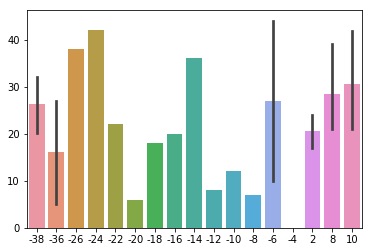

In [135]:
import seaborn as sns
sns.barplot(t[:50],range(50))

C:\Users\rsahi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


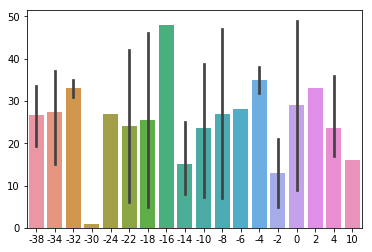

In [136]:
sns.barplot(t[50:100],range(50))

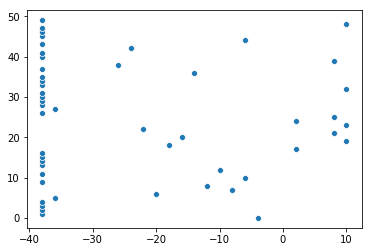

In [137]:
sns.scatterplot(t[:50],range(50))

C:\Users\rsahi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


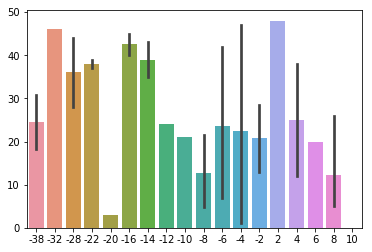

In [138]:
sns.barplot(t[100:150],range(50))

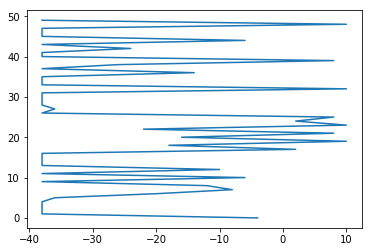

In [139]:
import matplotlib.pyplot as plt
plt.plot(t[0:50],range(50))

<BarContainer object of 50 artists>

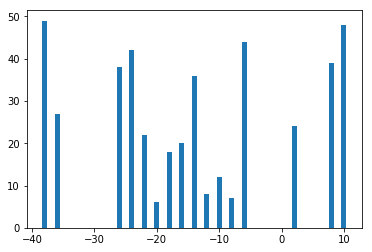

In [140]:
plt.bar(t[:50],range(50))

(array([206.,   0., 148.,   0., 124.,   0., 169.,   0., 173.,   0., 238.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 19 Patch objects>)

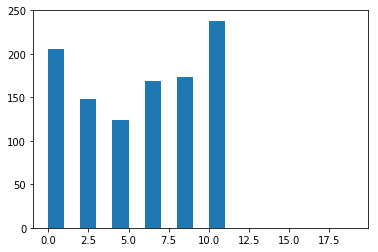

In [144]:
plt.hist(t[:],range(20))

# Selection of parameters-

In [176]:
alpha=[]
accuracy=[]
for i in range(11):

    w,l,t=agent_smith.train(gamma=0.99,alpha=0.1*i,epsilon=0.1,maxiter=1000)
    alpha.append(round((0.1*i),1))
   
    j=w+l
    accuracy1=((w/j)*100)
    accuracy.append(accuracy1)
    

print("Alpha: ",alpha)
print("Accuracy: ",accuracy)

Alpha:  [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
Accuracy:  [21.759999999999998, 21.5, 21.84, 21.099999999999998, 20.82, 20.5, 21.2, 20.96, 21.04, 20.560000000000002, 21.48]


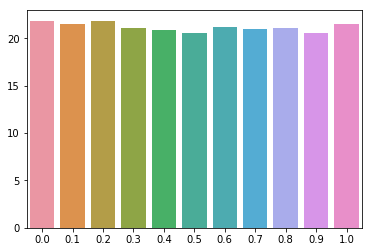

In [177]:
max_alpha=accuracy.index(max(accuracy))
sns.barplot(alpha[:],accuracy[:])

C:\Users\rsahi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


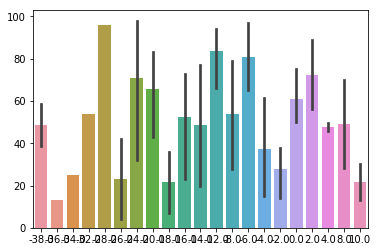

In [178]:
sns.barplot(t[:100],range(100))

In [162]:
epsilon=[]
accuracy=[]
for i in range(11):
    
    w,l,t=agent_smith.train(gamma=0.99,alpha=0.1,epsilon=(1.0-(0.1*i)),maxiter=1000)
    epsilon.append(round((0.1*i),1))
    
    a=w+l
    accuracy1=((w/a)*100)
    accuracy.append(accuracy1)

In [163]:
print("Epsilon: ",epsilon)
print("Accuracy: ",accuracy)
max_epsilon=accuracy.index(max(accuracy))

Epsilon:  [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
Accuracy:  [22.56, 22.54, 23.28, 23.22, 22.06, 21.32, 21.86, 21.959999999999997, 22.939999999999998, 22.02, 20.76]


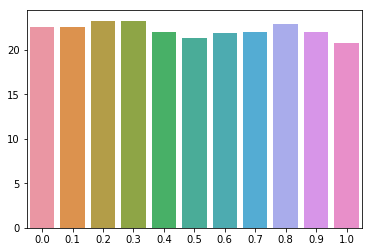

In [164]:
sns.barplot(epsilon[:],accuracy[:])

C:\Users\rsahi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


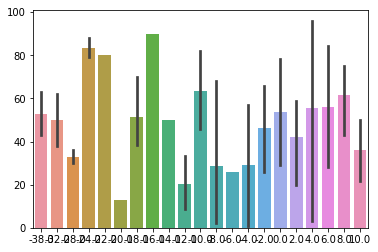

In [174]:
sns.barplot(t[:100],range(100))

In [169]:
gamma=[]
accuracy=[]
for i in range(11):
    
    w,l,t=agent_smith.train(gamma=0.9+(0.01*i),alpha=0.1,epsilon=0.1,maxiter=1000)
    gamma.append(round((0.9+(0.01*i)),2))
   
    b=w+l
    accuracy1=((w/b)*100)
    accuracy.append(accuracy1)

In [170]:
print("Gamma: ",gamma)
print("Accuracy: ",accuracy)
max_gamma=accuracy.index(max(accuracy))

Gamma:  [0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]
Accuracy:  [21.9, 22.52, 22.400000000000002, 21.62, 20.979999999999997, 21.94, 21.4, 22.46, 21.58, 21.4, 21.3]


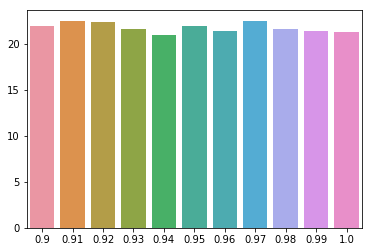

In [171]:
sns.barplot(gamma[:],accuracy[:])

C:\Users\rsahi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


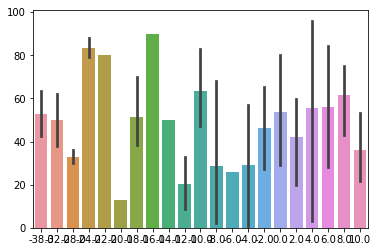

In [175]:
sns.barplot(t[:100],range(100))

# Analysis-

We can observe from the graph that what value is better for alpha, gamma and epsilon.These values are stored in max_alpha, max_gamma and max_epsilon. I've used these parameters to train my final model and test it using these parameters.
It can be observed from the graph that : <br>
Accuracy of alpha is  [21.759999999999998, 21.5, 21.84, 21.099999999999998, 20.82, 20.5, 21.2, 20.96, 21.04, 20.560000000000002, 21.48] <br>
Accuracy of epsilon is  [22.56, 22.54, 23.28, 23.22, 22.06, 21.32, 21.86, 21.959999999999997, 22.939999999999998, 22.02, 20.76] <br>
Accuracy of gamma is  [21.9, 22.52, 22.400000000000002, 21.62, 20.979999999999997, 21.94, 21.4, 22.46, 21.58, 21.4, 21.3]
From the results we can conclude that the epsilon is the best parameter for our case.

# Training with the best Parameter-

In [181]:
p1 = Player('Sahil', list())
p2 = Player('comp1', list(), isBot=True)
rummy = RummyAgent([p1,p2], max_card_length=3, max_turns=20)

agent = RLAgent(rummy)
w,l,t=agent.train(gamma=max_gamma,alpha=max_alpha,epsilon=max_epsilon,maxiter=1000)

In [183]:
accuracy1=((w/w+l)*100)
accuracy

[21.759999999999998,
 21.5,
 21.84,
 21.099999999999998,
 20.82,
 20.5,
 21.2,
 20.96,
 21.04,
 20.560000000000002,
 21.48]

# Conclusion-
I learnt how Reinforcement Learning works and how to implement a reward system for the card game rummy.I also learnt how the states and environments work.I learnt the difference between Q-learning and SARSA and how the Q-tables are updated for the policies.